# Analyze & Visualize Predictions

This notebook creates figures for the system description paper and will create spreadsheets for us to do some error analyis



**Imports**

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
sns.set_theme()

In [2]:
pd.read_csv("../predictions/task5/5739_kfold-split=3_model-name=DistilBertForSequenceClassification.tsv", sep="\t").keys()

Index(['tweet_id', 'user_id', 'tweet', 'label', 'train/dev',
       'predicted-label'],
      dtype='object')

In [3]:
pd.read_csv("../predictions/task6/7000_kfold-split=1_model-name=DistilBertForSequenceClassification.tsv", sep="\t").keys()

Index(['tweet_id', 'tweet', 'label', 'train/dev', 'predicted-label'], dtype='object')

**Create a dataframe of results for each task**

In [11]:
def get_preds_df(PATH):
    train_sizes, kfold_splits, f1, data_split, cross_train = [], [], [], [], []

    for f_name in os.listdir(PATH):
        is_crosstrained=False
        if f_name.endswith("md"):
            continue
        
        if "final" in f_name:
            continue
            
        if 'crosstrained' in f_name:
            is_crosstrained=True
            
        curr_df = pd.read_csv(PATH + f_name, sep="\t")

        f_name_lst = f_name.split("_")
        train_size = f_name_lst[0]
        if train_size == '5739':
            train_size = '5740'        
        elif train_size == '7561':
            train_size = '7562'
            
        kfold_split = f_name_lst[1][-1]

        for split in ['train', 'dev']:
            tmp_df = curr_df[curr_df['train/dev'] == split]


            train_sizes.append(int(train_size))
            #if split == 'train':
            #    print(train_size, tmp_df.shape[0])
            kfold_splits.append(kfold_split)
            if 'task5' in PATH:
                f1.append(f1_score(tmp_df['predicted-label'], tmp_df['label'], average='binary'))
            elif 'task6' in PATH:
                f1.append(f1_score(tmp_df['predicted-label'], tmp_df['label'], average='micro'))
            data_split.append(split)
            cross_train.append(is_crosstrained)
            

    df = pd.DataFrame({'train_size': train_sizes,
                       'kfold_split': kfold_splits,
                       'data_split': data_split,
                       'f1': f1,
                       'cross_train': cross_train})
    
    training_sizes = sorted(list(set(df['train_size'])))
    sizes2idx = {y:x+1 for x,y in enumerate(training_sizes)} 
    
    df['train_size_idx'] = df['train_size'].map(lambda x, sizes2idx=sizes2idx: sizes2idx[x])
    
    return df

In [12]:
task5_df = get_preds_df("../predictions/task5/")
task6_df = get_preds_df("../predictions/task6/")

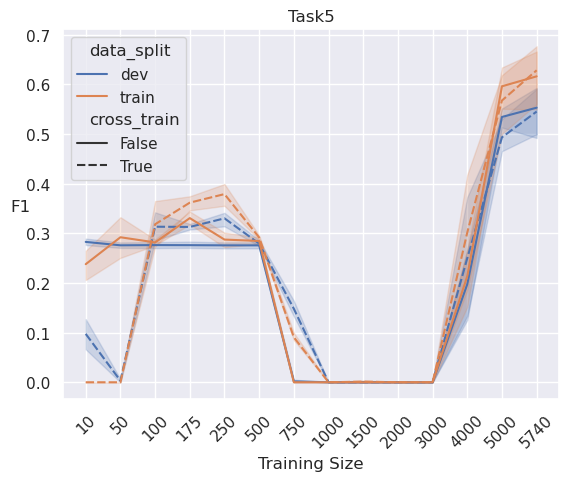

In [13]:
ax = sns.lineplot(data=task5_df.sort_values('data_split'), x="train_size_idx", y="f1", 
             hue='data_split', style='cross_train')
ax.set_xticks(sorted(list(set(task5_df['train_size_idx']))))
ax.set_xticklabels(sorted(list(set(task5_df['train_size']))))
ax.set_title("Task5")
ax.set_xlabel("Training Size")
ax.set_ylabel('F1', rotation=0)
plt.xticks(rotation = 45)
plt.savefig("../../figures/task5.png")
plt.show()

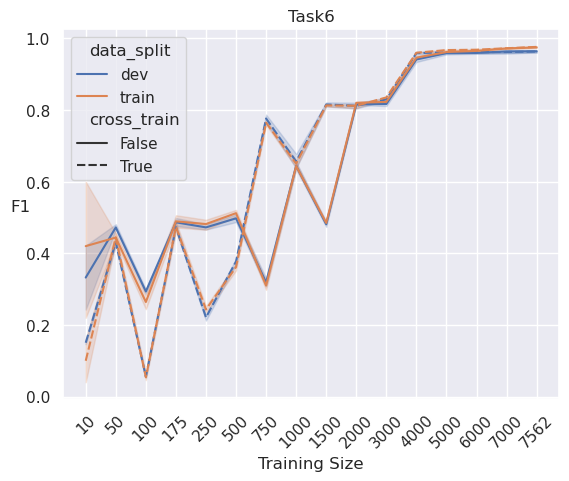

In [7]:
ax = sns.lineplot(data=task6_df.sort_values('data_split'), x="train_size_idx", y="f1", 
             hue='data_split', style='cross_train')
ax.set_xticks(sorted(list(set(task6_df['train_size_idx']))))
ax.set_xticklabels(sorted(list(set(task6_df['train_size']))))
ax.set_title("Task6")
ax.set_xlabel("Training Size")
ax.set_ylabel('F1', rotation=0)
plt.xticks(rotation = 45)
plt.savefig("../../figures/task6.png")
plt.show()